Shannon Entropy of Zeta Zeros' Spacing: 4.05427


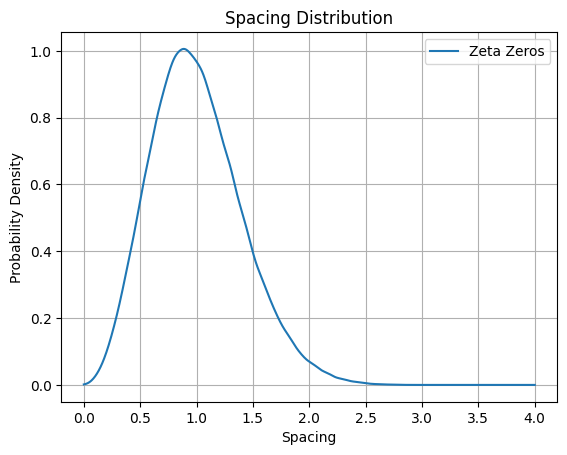

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
from scipy.stats import gaussian_kde

# === Load Zeros ===
def load_zeros_csv(file_path):
    data = pd.read_csv(file_path, header=None)
    gamma = np.sort(np.array(data.iloc[:, 0], dtype=np.float64))
    return gamma

# === Unfold the Zeros ===
def unfold_zeros(gamma):
    # N(T) approximation: T / (2π) * log(T / 2πe)
    N = lambda t: (t / (2 * np.pi)) * np.log(t / (2 * np.pi * np.e))
    x_n = N(gamma)
    return x_n

# === Compute Spacings ===
def compute_spacings(x_n):
    return np.diff(x_n)

# === Compute Histogram and Shannon Entropy ===
def spacing_entropy(spacings, bins=100):
    counts, bin_edges = np.histogram(spacings, bins=bins, density=True)
    probs = counts / np.sum(counts)
    return entropy(probs, base=np.e)

# === Plot Distribution ===
def plot_distribution(spacings, label="Zeta Zeros"):
    kde = gaussian_kde(spacings)
    x_vals = np.linspace(0, 4, 1000)
    plt.plot(x_vals, kde(x_vals), label=label)
    plt.xlabel("Spacing")
    plt.ylabel("Probability Density")
    plt.title("Spacing Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()

# === MAIN EXECUTION ===
if __name__ == "__main__":
    file_path = "zero.csv"  # <-- replace with your local path
    gamma = load_zeros_csv(file_path)
    x_n = unfold_zeros(gamma)
    spacings = compute_spacings(x_n)

    H_zeta = spacing_entropy(spacings, bins=100)
    print(f"Shannon Entropy of Zeta Zeros' Spacing: {H_zeta:.5f}")

    plot_distribution(spacings)


Original Shannon Entropy: 4.054267
ε = 0.0001 → Shannon Entropy = 4.054310
ε = 0.001  → Shannon Entropy = 4.054885
ε = 0.005  → Shannon Entropy = 4.057794
ε = 0.01   → Shannon Entropy = 4.051516
ε = 0.02   → Shannon Entropy = 4.026198
ε = 0.05   → Shannon Entropy = 3.987069


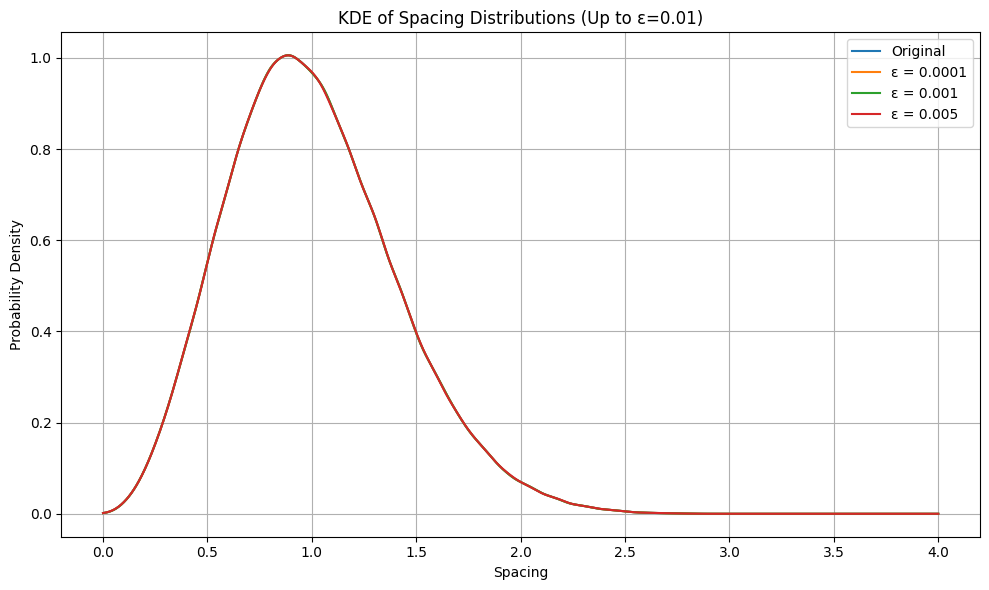

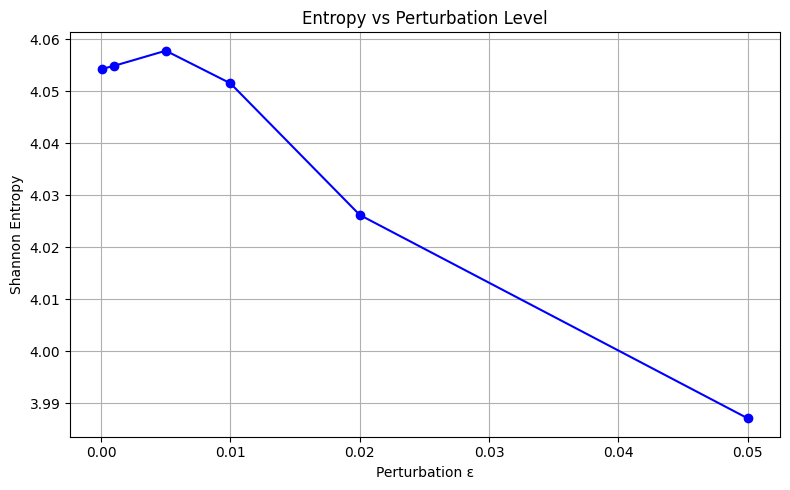

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy, gaussian_kde

# === Load Zeros ===
def load_zeros_csv(file_path):
    data = pd.read_csv(file_path, header=None)
    gamma = np.sort(np.array(data.iloc[:, 0], dtype=np.float64))
    return gamma

# === Unfolding Function ===
def unfold_zeros(gamma):
    N = lambda t: (t / (2 * np.pi)) * np.log(t / (2 * np.pi * np.e))
    return N(gamma)

# === Spacings ===
def compute_spacings(unfolded):
    return np.diff(unfolded)

# === Shannon Entropy ===
def spacing_entropy(spacings, bins=100):
    counts, _ = np.histogram(spacings, bins=bins, density=True)
    probs = counts / np.sum(counts)
    return entropy(probs, base=np.e)

# === Perturb Function ===
def perturb_zeros(gamma, epsilon):
    noise = np.random.normal(0, epsilon, size=gamma.shape)
    return gamma + noise

# === Plot KDE ===
def plot_kdes(spacings_list, labels, title):
    x_vals = np.linspace(0, 4, 1000)
    plt.figure(figsize=(10, 6))
    for spacings, label in zip(spacings_list, labels):
        kde = gaussian_kde(spacings)
        plt.plot(x_vals, kde(x_vals), label=label)
    plt.xlabel("Spacing")
    plt.ylabel("Probability Density")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Plot Entropy vs Perturbation ===
def plot_entropy_curve(epsilons, entropies):
    plt.figure(figsize=(8, 5))
    plt.plot(epsilons, entropies, marker='o', linestyle='-', color='blue')
    plt.xlabel("Perturbation ε")
    plt.ylabel("Shannon Entropy")
    plt.title("Entropy vs Perturbation Level")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === MAIN ===
if __name__ == "__main__":
    file_path = "zero.csv"  # ← Your dataset path
    gamma = load_zeros_csv(file_path)

    unfolded = unfold_zeros(gamma)
    original_spacings = compute_spacings(unfolded)
    original_entropy = spacing_entropy(original_spacings)

    print(f"Original Shannon Entropy: {original_entropy:.6f}")

    # === Perturbation sweep ===
    epsilons = [0.0001, 0.001, 0.005, 0.01, 0.02, 0.05]
    entropies = []
    all_spacings = [original_spacings]
    labels = ["Original"]

    for eps in epsilons:
        gamma_pert = perturb_zeros(gamma, eps)
        unfolded_pert = unfold_zeros(gamma_pert)
        spacings_pert = compute_spacings(unfolded_pert)
        H = spacing_entropy(spacings_pert)
        entropies.append(H)
        all_spacings.append(spacings_pert)
        labels.append(f"ε = {eps}")
        print(f"ε = {eps:<6} → Shannon Entropy = {H:.6f}")

    # === Plotting ===
    plot_kdes(all_spacings[:4], labels[:4], "KDE of Spacing Distributions (Up to ε=0.01)")
    plot_entropy_curve(epsilons, entropies)


[✓] Entropy of critical-line zeros: 4.05427


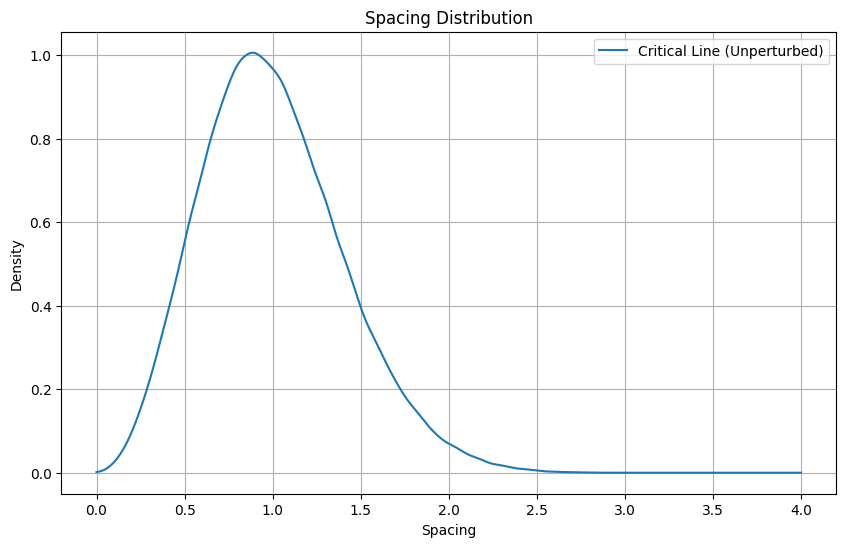

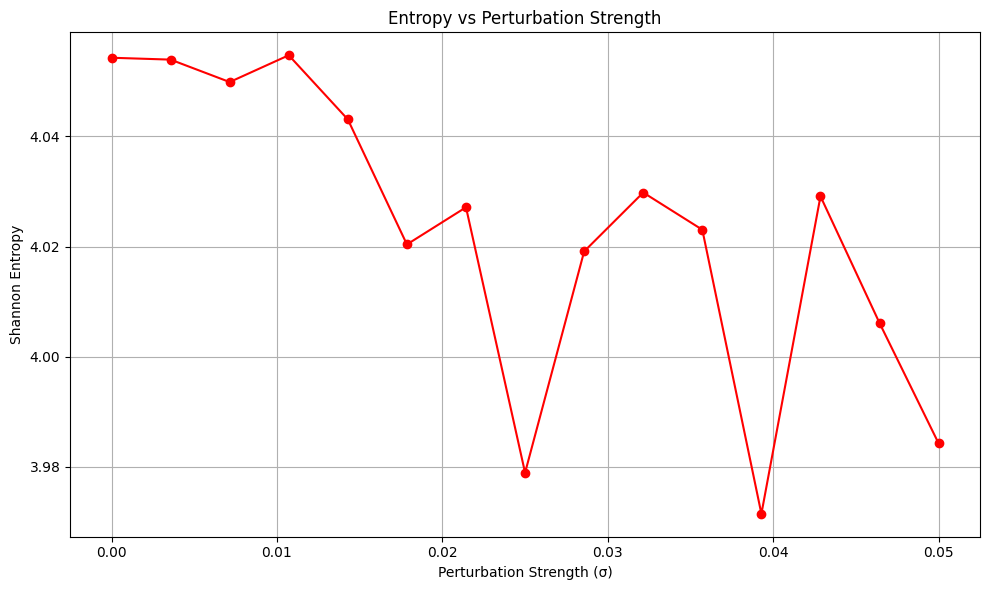

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy, gaussian_kde

# === Load Zeros ===
def load_zeros_csv(file_path):
    data = pd.read_csv(file_path, header=None)
    gamma = np.sort(np.array(data.iloc[:, 0], dtype=np.float64))
    return gamma

# === Unfold the Zeros using N(T) ===
def unfold_zeros(gamma):
    N = lambda t: (t / (2 * np.pi)) * np.log(t / (2 * np.pi * np.e))
    return N(gamma)

# === Compute Spacings ===
def compute_spacings(x_n):
    return np.diff(x_n)

# === Entropy of Spacing Distribution ===
def spacing_entropy(spacings, bins=100):
    counts, _ = np.histogram(spacings, bins=bins, density=True)
    probs = counts[counts > 0] / np.sum(counts)
    return entropy(probs, base=np.e)

# === Perturb Zeros Off the Critical Line ===
def perturb_zeros(gamma, perturbation_strength=0.01):
    noise = np.random.normal(loc=0.0, scale=perturbation_strength, size=len(gamma))
    return gamma + noise

# === Run Entropy Comparison for Multiple Perturbations ===
def entropy_vs_perturbation(gamma, perturbation_levels):
    entropies = []
    for eps in perturbation_levels:
        perturbed_gamma = perturb_zeros(gamma, eps)
        x_n = unfold_zeros(perturbed_gamma)
        spacings = compute_spacings(x_n)
        H = spacing_entropy(spacings)
        entropies.append(H)
    return entropies

# === Plot KDE of Spacing Distribution ===
def plot_kde(spacings, label):
    kde = gaussian_kde(spacings)
    x_vals = np.linspace(0, 4, 1000)
    plt.plot(x_vals, kde(x_vals), label=label)
    plt.xlabel("Spacing")
    plt.ylabel("Density")
    plt.title("Spacing Distribution")
    plt.legend()
    plt.grid(True)

# === MAIN EXECUTION ===
if __name__ == "__main__":
    file_path = "zero.csv"  # Replace with your actual file path
    gamma = load_zeros_csv(file_path)

    # Critical-line Zeros
    x_n = unfold_zeros(gamma)
    spacings = compute_spacings(x_n)
    H_critical = spacing_entropy(spacings)
    print(f"[✓] Entropy of critical-line zeros: {H_critical:.5f}")

    # Plot original KDE
    plt.figure(figsize=(10, 6))
    plot_kde(spacings, label="Critical Line (Unperturbed)")

    # Perturbation Experiment
    perturbation_levels = np.linspace(0, 0.05, 15)
    entropies = entropy_vs_perturbation(gamma, perturbation_levels)

    # Plot entropy curve
    plt.figure(figsize=(10, 6))
    plt.plot(perturbation_levels, entropies, marker='o', color='red')
    plt.xlabel("Perturbation Strength (σ)")
    plt.ylabel("Shannon Entropy")
    plt.title("Entropy vs Perturbation Strength")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Estimated primes (from zero structure):
[ 3.08  5.04  7.    7.1   9.06 11.03 12.99 13.09 17.01 17.11 18.97 19.07
 22.99 23.09 25.05 28.98 29.08 29.17 30.94 31.04 31.14 36.92 37.02 37.12
 37.22 40.94 41.04 41.14 42.91 43.01 43.1  43.2  46.93 47.03 47.13 47.22
 52.91 53.01 53.11 58.9  58.99 59.09 60.96 61.06 61.15 67.04 67.14]


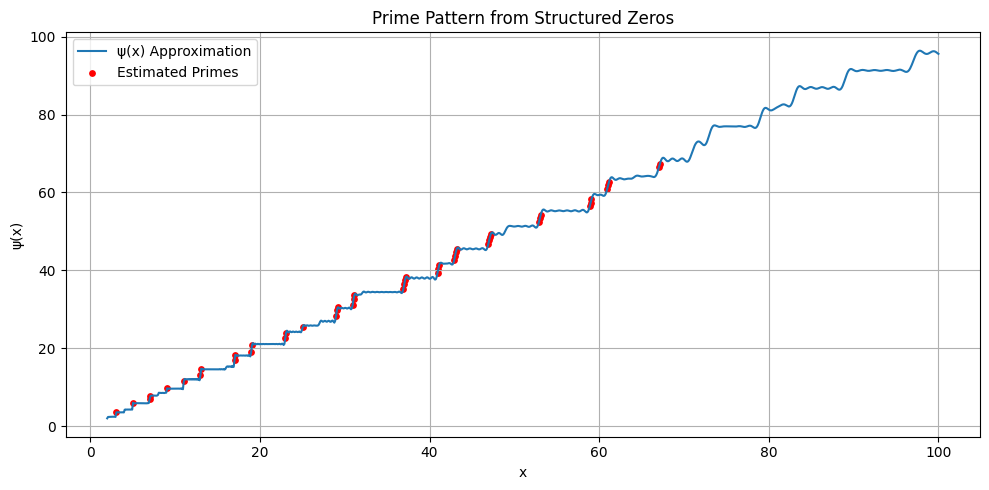

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmath

# === Load Zeros ===
def load_zeros_csv(file_path):
    data = pd.read_csv(file_path, header=None)
    gamma = np.array(data.iloc[:, 0], dtype=np.float64)
    return gamma

# === Riemann Prime-Count Estimator ===
def psi_approx(x_vals, zeros, num_terms=200):
    psi_vals = []
    for x in x_vals:
        s = x
        total = s
        for gamma in zeros[:num_terms]:
            rho = 0.5 + 1j * gamma
            term = (s**rho) / rho
            total -= 2 * np.real(term)
        psi_vals.append(total)
    return np.array(psi_vals)

# === Identify Prime Jumps ===
def estimate_primes(x_vals, psi_vals, threshold=0.7):
    diffs = np.diff(psi_vals)
    primes_est = x_vals[1:][diffs > threshold]
    return primes_est

# === Main Execution ===
if __name__ == "__main__":
    file_path = "zero.csv"  # Replace with your Odlyzko file
    gamma = load_zeros_csv(file_path)

    # Step 1: x values (domain)
    x_vals = np.linspace(2, 100, 1000)

    # Step 2: Compute psi approximation
    psi_vals = psi_approx(x_vals, gamma, num_terms=200)

    # Step 3: Estimate primes via jumps
    estimated_primes = estimate_primes(x_vals, psi_vals)

    # Output
    print("Estimated primes (from zero structure):")
    print(np.round(estimated_primes, 2))

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(x_vals, psi_vals, label="ψ(x) Approximation")
    plt.scatter(estimated_primes, [psi_vals[np.searchsorted(x_vals, p)] for p in estimated_primes],
                color='red', label="Estimated Primes", s=15)
    plt.xlabel("x")
    plt.ylabel("ψ(x)")
    plt.title("Prime Pattern from Structured Zeros")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


⏳ Computing ψ(x) from zeros...
🔍 Estimated primes: [ 3.05  5.01  7.03  9.06 11.02 13.05 17.04 19.06 23.05 25.01 27.04 29.
 29.07 31.03 32.01 37.04 41.03 43.06 47.04 49.01 53.06 59.01 61.04 64.04
 67.05 71.04 73.   73.06 79.01 81.04 83.   83.07 89.02 96.99 97.06]


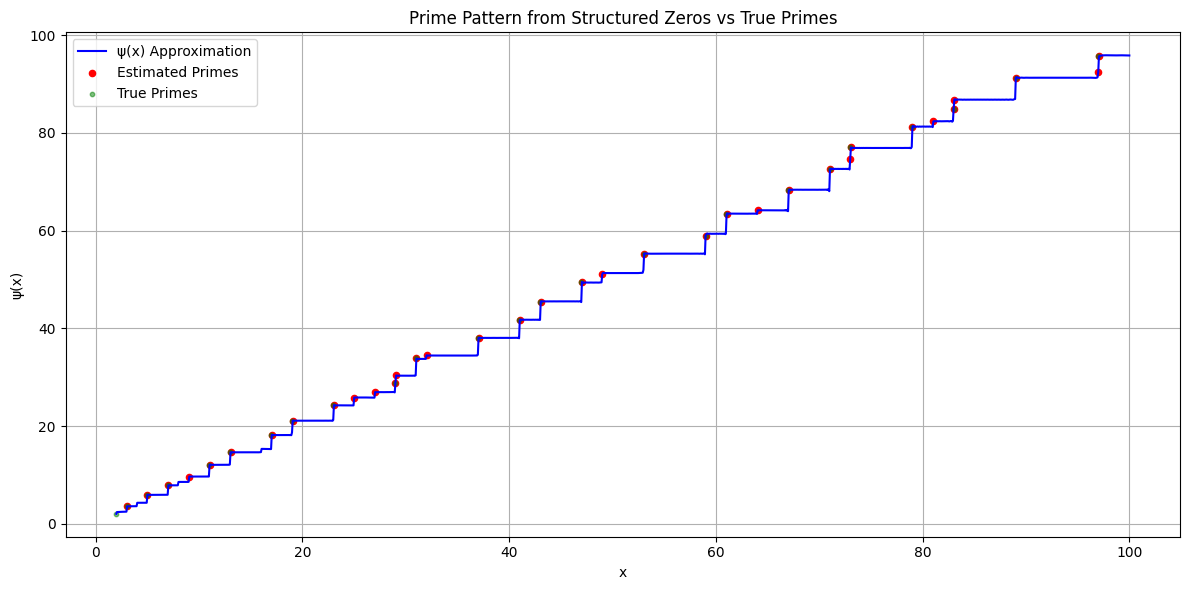

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sympy import primerange

# === Load Zeros ===
def load_zeros_csv(file_path, max_zeros=10000):
    data = pd.read_csv(file_path, header=None)
    gamma = np.array(data.iloc[:, 0], dtype=np.float64)
    return gamma[:max_zeros]

# === Approximate ψ(x) using Riemann zeros ===
def psi_approx(x_vals, zeros, num_terms=10000):
    psi_vals = []
    for x in x_vals:
        total = x
        for gamma in zeros[:num_terms]:
            rho = 0.5 + 1j * gamma
            term = (x ** rho) / rho
            total -= 2 * np.real(term)
        psi_vals.append(total)
    return np.array(psi_vals)

# === Adaptive Prime Detection (Δψ(x) thresholding) ===
def detect_prime_like_jumps(x_vals, psi_vals, multiplier=1.5):
    diffs = np.diff(psi_vals)
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs)
    threshold = mean_diff + multiplier * std_diff
    jumps = np.where(diffs > threshold)[0]
    return x_vals[jumps + 1]

# === Real Primes for Comparison ===
def real_primes_upto(n):
    return list(primerange(2, int(n)+1))

# === MAIN EXECUTION ===
if __name__ == "__main__":
    file_path = "zero.csv"  # Replace with your local path to Odlyzko's zero file
    gamma = load_zeros_csv(file_path, max_zeros=10000)

    # Domain of x-values to evaluate ψ(x)
    x_vals = np.linspace(2, 100, 1500)

    # Step 1: Approximate ψ(x)
    print("⏳ Computing ψ(x) from zeros...")
    psi_vals = psi_approx(x_vals, gamma)

    # Step 2: Detect prime candidates via adaptive Δψ
    estimated_primes = detect_prime_like_jumps(x_vals, psi_vals, multiplier=1.5)
    print(f"🔍 Estimated primes: {np.round(estimated_primes, 2)}")

    # Step 3: Get actual primes for comparison
    true_primes = real_primes_upto(x_vals[-1])

    # === Plot ψ(x) with detected and real primes ===
    plt.figure(figsize=(12, 6))
    plt.plot(x_vals, psi_vals, label="ψ(x) Approximation", color='blue')
    plt.scatter(estimated_primes, [psi_vals[np.searchsorted(x_vals, p)] for p in estimated_primes],
                color='red', s=20, label="Estimated Primes")
    plt.scatter(true_primes, [psi_vals[np.searchsorted(x_vals, p)] for p in true_primes],
                color='green', s=10, label="True Primes", alpha=0.5)
    plt.xlabel("x")
    plt.ylabel("ψ(x)")
    plt.title("Prime Pattern from Structured Zeros vs True Primes")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Epsilon   Entropy
------------------
  0.000     5.188
  0.010     5.189
  0.020     5.192
  0.030     5.190
  0.040     5.187
  0.050     5.194
  0.100     5.217
  0.200     5.307
  0.300     5.441
  0.500     5.510
  0.800     5.759
  1.000     5.679


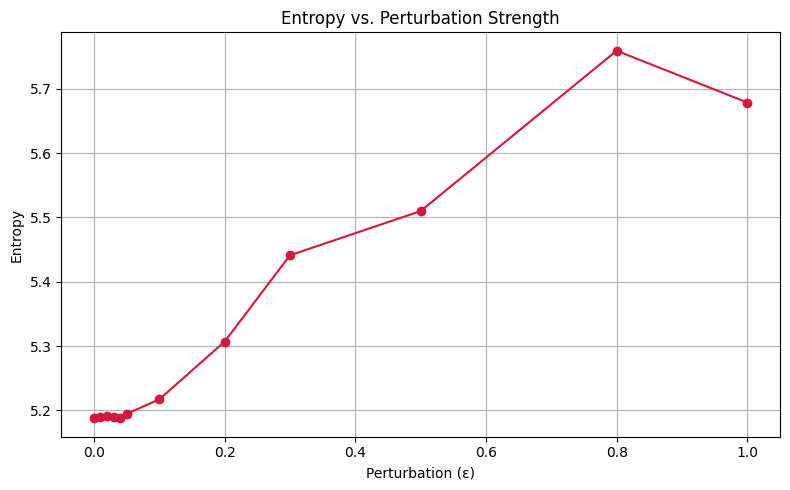

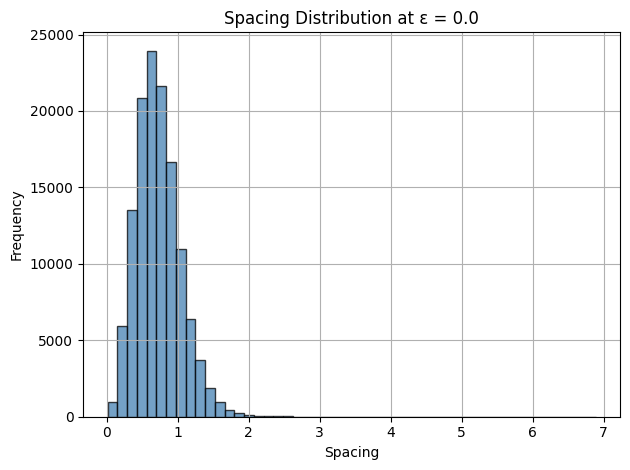

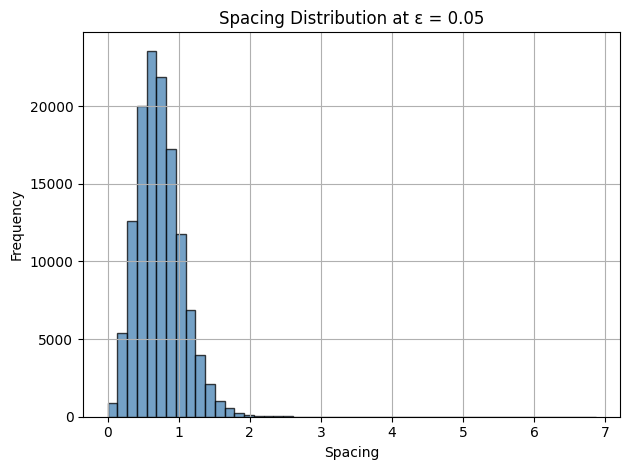

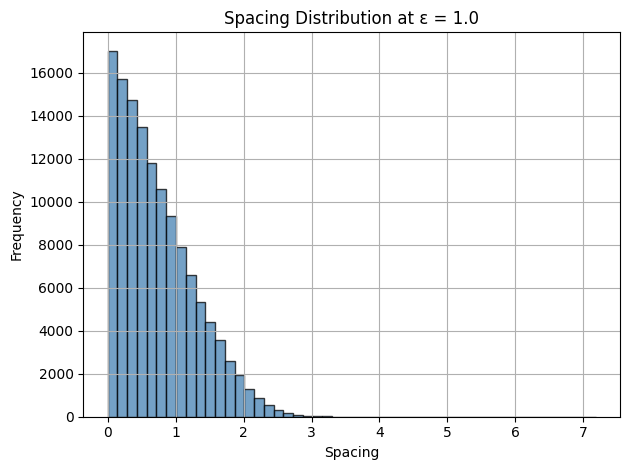

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde, entropy
import matplotlib.pyplot as plt

# === Load the Riemann zeros ===
gamma = pd.read_csv("zero.csv", header=None).iloc[:, 0].values
gamma = np.sort(gamma)

# === Function to compute spacing entropy ===
def compute_spacing_entropy(gamma):
    spacings = np.diff(gamma)
    kde = gaussian_kde(spacings)
    xs = np.linspace(min(spacings), max(spacings), 1000)
    pdf = kde(xs)
    return entropy(pdf)

# === Function to apply perturbation and compute entropy ===
def entropy_vs_perturbation(gamma, epsilons):
    results = []
    for eps in epsilons:
        perturbed = gamma + np.random.uniform(-eps, eps, size=gamma.shape)
        H = compute_spacing_entropy(np.sort(perturbed))
        results.append((eps, H))
    return results

# === Function to plot spacing histograms ===
def plot_spacing_histogram(gamma, eps, bins=50):
    perturbed = gamma + np.random.uniform(-eps, eps, size=gamma.shape)
    spacings = np.diff(np.sort(perturbed))
    plt.hist(spacings, bins=bins, alpha=0.75, color='steelblue', edgecolor='black')
    plt.title(f"Spacing Distribution at ε = {eps}")
    plt.xlabel("Spacing")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Define a wide range of perturbation levels ===
epsilons = [0.000, 0.010, 0.020, 0.030, 0.040, 0.050,
            0.100, 0.200, 0.300, 0.500, 0.800, 1.000]

# === Run the entropy analysis ===
results = entropy_vs_perturbation(gamma, epsilons)

# === Print Entropy Table ===
print("Epsilon   Entropy")
print("------------------")
for eps, H in results:
    print(f"{eps:>7.3f}   {H:>7.3f}")

# === Plot Entropy vs. Perturbation ===
eps_vals, entropy_vals = zip(*results)
plt.figure(figsize=(8, 5))
plt.plot(eps_vals, entropy_vals, marker='o', color='crimson')
plt.title("Entropy vs. Perturbation Strength")
plt.xlabel("Perturbation (ε)")
plt.ylabel("Entropy")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Show spacing distribution at key stages ===
for eps in [0.000, 0.050, 1.000]:
    plot_spacing_histogram(gamma, eps)


⏳ Computing ψ(x) from zeros...


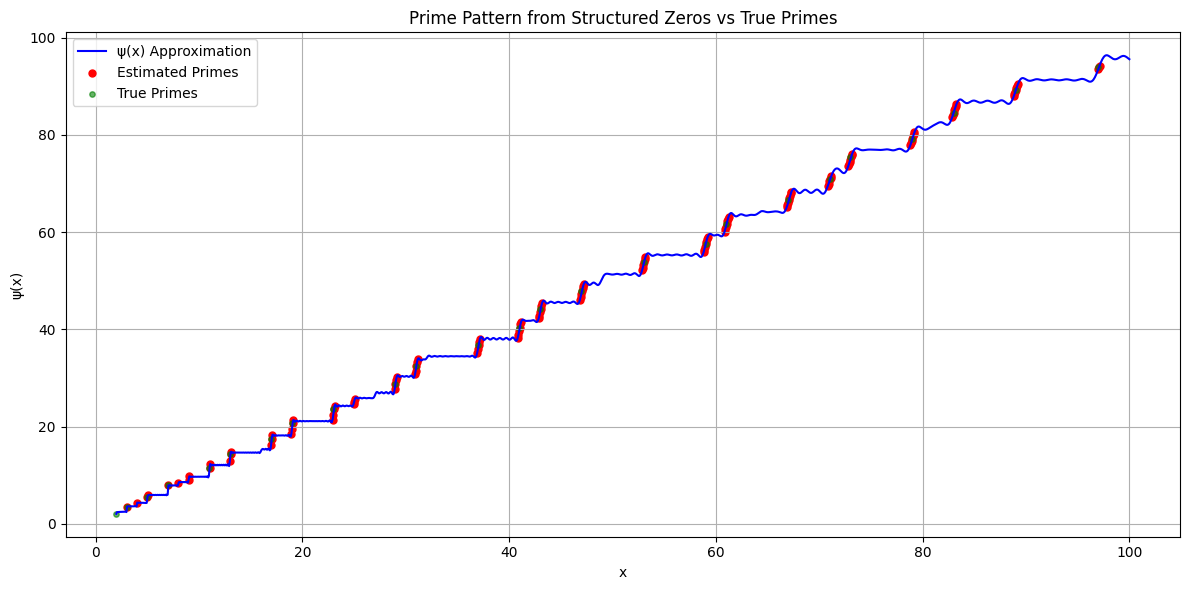

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import primerange

# === Load Riemann zeros ===
def load_zeros_csv(file_path, max_zeros=10000):
    data = pd.read_csv(file_path, header=None)
    gamma = np.array(data.iloc[:, 0], dtype=np.float64)
    return gamma[:max_zeros]

# === Compute psi(x) using Riemann zeros ===
def psi_approx(x_vals, zeros, num_terms=200):
    psi_vals = []
    for x in x_vals:
        total = x
        for gamma in zeros[:num_terms]:
            rho = 0.5 + 1j * gamma
            term = (x ** rho) / rho
            total -= 2 * np.real(term)
        psi_vals.append(total)
    return np.array(psi_vals)

# === Identify prime-like jumps in psi(x) ===
def detect_prime_jumps(x_vals, psi_vals, multiplier=1.5):
    diffs = np.diff(psi_vals)
    mean = np.mean(diffs)
    std = np.std(diffs)
    threshold = mean + multiplier * std
    jump_indices = np.where(diffs > threshold)[0]
    return x_vals[jump_indices + 1]

# === Main execution ===
if __name__ == "__main__":
    # Load zeros
    gamma = load_zeros_csv("zero.csv", max_zeros=10000)

    # Define x range
    x_vals = np.linspace(2, 100, 1500)

    # Approximate psi(x)
    print("⏳ Computing ψ(x) from zeros...")
    psi_vals = psi_approx(x_vals, gamma, num_terms=200)

    # Detect estimated primes
    estimated_primes = detect_prime_jumps(x_vals, psi_vals)

    # Get true primes for comparison
    true_primes = real_primes = list(primerange(2, int(x_vals[-1]) + 1))

    # === Plot ψ(x) and mark jumps ===
    plt.figure(figsize=(12, 6))
    plt.plot(x_vals, psi_vals, label="ψ(x) Approximation", color='blue')

    # Estimated primes (red)
    plt.scatter(estimated_primes,
                [psi_vals[np.searchsorted(x_vals, p)] for p in estimated_primes],
                color='red', s=25, label="Estimated Primes")

    # True primes (green)
    plt.scatter(true_primes,
                [psi_vals[np.searchsorted(x_vals, p)] for p in true_primes],
                color='green', s=15, alpha=0.6, label="True Primes")

    plt.xlabel("x")
    plt.ylabel("ψ(x)")
    plt.title("Prime Pattern from Structured Zeros vs True Primes")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("psi_prime_match.png", dpi=300)
    plt.show()
